In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
input_path = 'Input/'

prescriptions= input_path + 'prescriptions.csv'
prescriptions = pd.read_csv(prescriptions, delimiter=",")

# Preprocessing prescription dataset

In [3]:
prescriptions = prescriptions[['HADM_ID', 'STARTDATE', 'ENDDATE', 'DRUG_TYPE', 'DRUG']]
prescriptions.drop_duplicates(keep='first', inplace=True)
prescriptions = prescriptions.loc[prescriptions.DRUG_TYPE!='BASE']
prescriptions['DRUG'] = prescriptions['DRUG'].str.rstrip()
replacement_mapping_dict = {
    '*NF* Epirubicin': 'Epirubicin',
    'Acetaminophen (Liquid)': 'Acetaminophen',
    'Acetaminophen (Rectal)': 'Acetaminophen',
    'Acetaminophen IV': 'Acetaminophen',
    'Acetylcysteine 20%': 'Acetylcysteine',
    'Acyclovir Ointment 5%': 'Acyclovir',
    'Albumin 25% (12.5g / 50mL)': 'Albumin_human',
    'Albumin 5% (25g / 500mL)': 'Albumin_human',
    'Albuterol': 'Salbutamol',
    'Albuterol 0.083% Neb Soln': 'Salbutamol',
    'Albuterol Inhaler': 'Salbutamol',
    'Albuterol MDI': 'Salbutamol',
    'Albuterol Neb Soln': 'Salbutamol',
    'Alteplase (Catheter Clearance)': 'Alteplase',
    'Aluminum Hydroxide Suspension': 'Aluminum_hydroxide',
    'Aluminum-Magnesium Hydrox.-Simethicone': 'Magnesium_aluminum_silicate',
    'Amiodarone HCl': 'Amiodarone',
    'Ampicillin-Sulbactam': 'Ampicillin',
    'Ascorbic Acid': 'Ascorbic_acid',
    'Ascorbic Acid (Liquid)': 'Ascorbic_acid',
    'Aspirin': 'Acetylsalicylic_acid',
    'Atovaquone Suspension': 'Atovaquone',
    'Atropine Sulfate': 'Atropine',
    'Beclomethasone': 'Beclomethasone_dipropionate',
    'Bisacodyl (Rectal)': 'Bisacodyl',
    'Bismuth Subsalicylate': 'Bismuth_subsalicylate',
    'Brimonidine Tartrate 0.15% Ophth.': 'Brimonidine',
    'Bupivacaine 0.25%': 'Bupivacaine',
    'CARBOplatin': 'Carboplatin',
    'CISplatin': 'Cisplatin',
    'Calcium Acetate': 'Calcium_acetate',
    'Calcium Carbonate': 'Calcium_carbonate',
    'Calcium Gluconate': 'Calcium_gluconate',
    'CefePIME': 'Cefepime',
    'CeftriaXONE': 'Ceftriaxone',
    'Cetylpyridinium Chl (Cepacol)': 'Cetylpyridinium',
    'Chlorhexidine Gluconate': 'Chlorhexidine',
    'Chlorhexidine Gluconate 0.12% Oral Rinse': 'Chlorhexidine',
    'ChlorproMAZINE': 'Chlorpromazine',
    'Ciprofloxacin HCl': 'Ciprofloxacin',
    'Ciprofloxacin IV': 'Ciprofloxacin',
    'Citalopram Hydrobromide': 'Citalopram',
    'Codeine Sulfate': 'Codeine',
    'CycloSPORINE (Neoral) MODIFIED': 'Cyclosporine',
    'CycloSPORINE (Sandimmune)': 'Cyclosporine',
    'Cyclobenzaprine HCl': 'Cyclobenzaprine',
    'DAUNOrubicin Citrate Liposomal': 'Daunorubicin',
    'DOCEtaxel (TaxoTERE)': 'Docetaxel',
    'DOXOrubicin': 'Doxorubicin',
    'Dexamethasone Sod Phosphate': 'Dexamethasone',
    'Dextrose 50%': 'Dextrose,_unspecified_form',
    'DiphenhydrAMINE': 'Diphenhydramine',
    'DiphenhydrAMINE HCl': 'Diphenhydramine',
    'Diphenhydramine HCl': 'Diphenhydramine',
    'Diphenoxylate HCl/Atrop Sulf': 'Diphenoxylate',
    'Docusate Sodium': 'Docusate',
    'Docusate Sodium (Liquid)': 'Docusate',
    'Dolasetron Mesylate': 'Dolasetron',
    'Dorzolamide 2% Ophth. Soln.': 'Dorzolamide',
    'Enalapril Maleate': 'Enalapril',
    'Enoxaparin Sodium': 'Enoxaparin',
    'Epinephrine 1:1000': 'Epinephrine',
    'Epoetin Alfa': 'Erythropoietin',
    'Fentanyl Citrate': 'Fentanyl',
    'Fentanyl Patch': 'Fentanyl',
    'Ferrous Gluconate': 'Ferrous_gluconate',
    'Ferrous Sulfate': 'Ferrous_sulfate_anhydrous',
    'Ferrous Sulfate (Liquid)': 'Ferrous_sulfate_anhydrous',
    'Fludrocortisone Acetate': 'Fludrocortisone',
    'Fluoxetine HCl': 'Fluoxetine',
    'FoLIC Acid': 'Folic_acid',
    'Folic Acid': 'Folic_acid',
    'Fondaparinux Sodium': 'Fondaparinux',
    'Gemcitabine HCl': 'Gemcitabine',
    'Gentamicin Sulfate': 'Gemcitabine',
    'GlipiZIDE XL': 'Glipizide',
    'Glutamine': 'L-glutamine',
    'HYDROmorphone': 'Hydromorphone',
    'HYDROmorphone (Dilaudid)': 'Hydromorphone',
    'HYDROmorphone-HP': 'Hydromorphone',
    'Heparin Flush (10 units/ml)': 'Heparin',
    'Heparin Flush (100 units/ml)': 'Heparin',
    'Heparin Flush (1000 units/mL)': 'Heparin',
    'Heparin Flush CVL  (100 units/ml)': 'Heparin',
    'Heparin Flush PICC (100 units/ml)': 'Heparin',
    'Heparin Flush Port (10units/ml)': 'Heparin',
    'Heparin Sodium': 'Heparin',
    'HydrALAZINE HCl': 'Hydralazine',
    'HydrALAzine': 'Hydralazine',
    'HydrOXYzine': 'Hydroxyzine',
    'HydrOXYzine HCl': 'Hydroxyzine',
    'Hydrocortisone Cream 1%': 'Hydrocortisone',
    'Hydrocortisone Na Succ.': 'Hydrocortisone_succinate',
    'Hydrocortisone Na Succinate': 'Hydrocortisone_succinate',
    'Insulin': 'Insulin_human',
    'Insulin Human Regular': 'Insulin_human',
    'Interferon Alfa-2B': 'Interferon_alfa-2b',
    'Ipratropium Bromide MDI': 'Ipratropium',
    'Ipratropium Bromide Neb': 'Ipratropium',
    'Irinotecan HCl': 'Irinotecan',
    'Isosorbide Dinitrate': 'Isosorbide_dinitrate',
    'Lansoprazole Oral Disintegrating Tab': 'Lansoprazole',
    'LeVETiracetam': 'Levetiracetam',
    'Leucovorin Calcium': 'Leucovorin',
    'Levothyroxine Sodium': 'Levothyroxine',
    'Lidocaine 1%': 'Lidocaine',
    'Lidocaine 1% P.f.': 'Lidocaine',
    'Lidocaine 2%': 'Lidocaine',
    'Lidocaine 2% P.f.': 'Lidocaine',
    'Lidocaine 5% Patch': 'Lidocaine',
    'Lidocaine Jelly 2% (Urojet)': 'Lidocaine',
    'Loperamide HCl': 'Loperamide',
    'Magnesium Citrate': 'Magnesium_citrate',
    'Magnesium Oxide': 'Magnesium_oxide',
    'Magnesium Sulfate': 'Magnesium_sulfate',
    'Magnesium Sulfate Replacement (Oncology)': 'Magnesium_sulfate',
    'Mannitol 20%': 'Mannitol',
    'MetRONIDAZOLE (FLagyl)': 'Metronidazole',
    'Methotrexate Sodium': 'Methotrexate',
    'Methotrexate Sodium P.F.': 'Methotrexate',
    'MethylPHENIDATE (Ritalin)': 'Methylphenidate',
    'MethylPREDNISolone Sodium Succ': 'Methylprednisolone',
    'Methylphenidate HCl': 'Methylphenidate',
    'Methylprednisolone Na Succ': 'Methylprednisolone',
    'Methylprednisolone Na Succ.': 'Methylprednisolone',
    'Metoprolol Tartrate': 'Metoprolol',
    'Miconazole Powder 2%': 'Miconazole',
    'Midazolam HCl': 'Midazolam',
    'Milk of Magnesia': 'Magnesium_hydroxide',
    'Mitoxantrone HCl': 'Mitoxantrone',
    'Morphine SR (MS Contin)': 'Morphine',
    'Morphine Sulfate': 'Morphine',
    'Morphine Sulfate (Oral Soln.)': 'Morphine',
    'Morphine Sulfate IR': 'Morphine',
    'Morphine Sulfate SR': 'Morphine',
    'Mupirocin Nasal Ointment 2%': 'Mupirocin',
    'NIFEdipine': 'Nifedipine',
    'Nitroglycerin SL': 'Nitroglycerin',
    'Nystatin Oral Susp.': 'Nystatin',
    'Nystatin Oral Suspension': 'Nystatin',
    'Olanzapine (Disintegrating Tablet)': 'Olanzapine',
    'Ondansetron HCl': 'Ondansetron',
    'Ondansetron ODT': 'Ondansetron',
    'OxycoDONE (Immediate Release)': 'Oxycodone',
    'OxycodONE (Immediate Release)': 'Oxycodone',
    'Oxycodone SR (OxyconTIN)': 'Oxycodone',
    'PACLItaxel': 'Paclitaxel',
    'PACLItaxel (TaxOL)': 'Paclitaxel',
    'Pantoprazole Sodium': 'Pantoprazole',
    'Paroxetine HCl': 'Paroxetine',
    'Pentamidine Inhalation': 'Pentamidine',
    'Phytonadione': 'Phylloquinone',
    'Polyethylene Glycol': 'Polyethylene_glycol',
    'Posaconazole Suspension': 'Posaconazole',
    'Potassium Chloride': 'Potassium_chloride',
    'Potassium Chloride (Powder)': 'Potassium_chloride',
    'Potassium Chloride Replacement (Oncology)': 'Potassium_chloride',
    'Potassium Phosphate': 'Monopotassium_phosphate',
    'PredniSONE': 'Prednisone',
    'PrednisoLONE Acetate 1% Ophth. Susp.': 'Prednisolone_acetate',
    'Prednisolone Acetate 0.12% Ophth. Susp.': 'Prednisolone_acetate',
    'Prednisolone Acetate 1% Ophth. Susp.': 'Prednisolone_acetate',
    'Procarbazine HCl': 'Procarbazine',
    'Prochlorperazine (Rectal)': 'Prochlorperazine',
    'Prochlorperazine Maleate': 'Prochlorperazine',
    'Promethazine HCl': 'Promethazine',
    'Pseudoephedrine HCl': 'Pseudoephedrine',
    'Ranitidine (Liquid)': 'Ranitidine',
    'Ranitidine HCl': 'Ranitidine',
    'Readi-Cat 2 (Barium Sulfate 2% Suspension)': 'Barium_sulfate',
    'Salmeterol Xinafoate Diskus (50 mcg)': 'Salmeterol',
    'Scopolamine Patch': 'Scopolamine',
    'Senna': 'Senna_leaf',
    'Sodium Bicarbonate': 'Sodium_bicarbonate',
    'Sodium Chloride': 'Sodium_chloride',
    'Sodium Chloride 0.9%  Flush': 'Sodium_chloride',
    'Sodium Chloride 3% Inhalation Soln': 'Sodium_chloride',
    'Sodium Chloride Nasal': 'Sodium_chloride',
    'Sodium Fluoride (Dental Gel)': 'Sodium_fluoride',
    'Sodium Phosphate': 'Sodium_phosphate,_monobasic',
    'Sodium Polystyrene Sulfonate': 'Tolevamer',
    'Sulfameth/Trimethoprim DS': 'Sulfamethazine',
    'Sulfameth/Trimethoprim SS': 'Sulfamethazine',
    'Thiamine HCl': 'Thiamine',
    'Tuberculin Protein': 'Tuberculin_purified_protein_derivative',
    'Ursodiol': 'Ursodeoxycholic_acid',
    'ValGANCIclovir': 'Valganciclovir',
    'Valproate Sodium': 'Valproate_bismuth',
    'Vancomycin HCl': 'Vancomycin',
    'Vancomycin Oral Liquid': 'Vancomycin',
    'Venlafaxine XR': 'Venlafaxine',
    'Viagra': 'Sildenafil',
    'VinCRIStine': 'Vincristine',
    'VinCRIStine (Oncovin)': 'Vincristine',
    'VinORELbine (Navelbine)': 'Vinorelbine',
    'Vinblastine Sulfate': 'Vinblastine',
    'Vincristine Sulfate': 'Vincristine',
    'Vitamin D': 'Vitamin_d',
    'ZOFRAN ODT': 'Ondansetron',
    'ZYRtec': 'Cetirizine',
    'Zofran': 'Ondansetron',
    'Zoledronic Acid': 'Zoledronic_acid',
    'Zolpidem Tartrate': 'Zolpidem',
    'sodium bicarb': 'Sodium_bicarbonate',
    'traZODONE': 'Trazodone',
    'Ambisome': 'Amphotericin_b',
    'Cosyntropin': 'Tetracosactide',
    'Doxil': 'Doxorubicin',
    'Faslodex': 'Fulvestrant',
    'Foscarnet Sodium': 'Foscarnet',
    'Lyrica': 'Pregabalin',
    'Mesna': 'Coenzyme_m',
    'Mirapex': 'Pramipexole',
    'Mycophenolate Mofetil': 'Mycophenolate_mofetil',
    'Tobramycin Sulfate': 'Tobramycin',
    'Xopenex Neb': 'Levosalbutamol'
}
replacement_combination = {
    'Maalox/Diphenhydramine/Lidocaine': 'Diphenhydramine-/-Lidocaine',
    'Acetaminophen w/Codeine': 'Acetaminophen-/-Codeine',
    'Hydrocodone-Acetaminophen': 'Hydrocodone-/-Acetaminophen',
    'Piperacillin-Tazobactam': 'Piperacillin-/-Tazobactam',
    'Albuterol-Ipratropium': 'Salbutamol-/-Ipratropium',
    'Guaifenesin-CODEINE Phosphate': 'Guaifenesin-/-Codeine',
    'Guaifenesin-Codeine Phosphate': 'Guaifenesin-/-Codeine',
    'Guaifenesin-Dextromethorphan': 'Guaifenesin-/-Dextromethorphan',
    'Oxycodone-Acetaminophen': 'Oxycodone-/-Acetaminophen',
    'Piperacillin-Tazobactam': 'Piperacillin-/-Tazobactam',
    'Piperacillin-Tazobactam Na': 'Piperacillin-/-Tazobactam'
}

prescriptions['DRUG'].replace(replacement_mapping_dict, inplace=True)
prescriptions['DRUG'].replace(replacement_combination, inplace=True)
# ===== Removing unknown drugs =====
unknown_drug = ['Artificial Tears', 'Astepro', 'Calcium Replacement (Oncology)', 'Candida Skin Test', 'Caphosol',
               'Cepacol (Menthol)', 'Fleet Phospho-Soda', 'GELCLAIR', 'Gelclair', 'Hydrocerin', 'Imipenem-Cilastatin',
               'Influenza Virus Vaccine', 'Multivitamin 12', 'Multivitamin IV', 'Multivitamins', 'Neutra-Phos',
               'Parenteral Nutrition (TPN)', 'Prevident Mint Gel 1.1%', 'Sarna Lotion']
prescriptions = prescriptions.loc[~prescriptions.DRUG.isin(unknown_drug)]
display(prescriptions.shape, prescriptions.head(5))

(24102, 5)

,HADM_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG
1,100489,2164-01-23,2164-01-24,MAIN,Ranitidine
2,100489,2164-01-23,2164-02-03,MAIN,Sodium_chloride
3,100489,2164-01-23,2164-02-20,MAIN,Heparin
4,100489,2164-01-24,2164-01-25,MAIN,Fluconazole
7,100489,2164-01-25,2164-01-25,MAIN,Guaifenesin


In [4]:
onco_drug = ['Cisplatin', 'Pemetrexed', 'Docetaxel', 'Carboplatin', 'Etoposide', 'Gemcitabine', 'Vinorelbine',
             'Nivolumab', 'Crizotinib', 'Ceritinib', 'Ipilimumab', 'Paclitaxel', 'Necitumumab', 'Bevacizumab',
             'Afatinib', 'Osimertinib', 'Alectinib', 'Pembrolizumab']
reg_onco_drug = '|'.join(onco_drug)
reg_onco_drug

'Cisplatin|Pemetrexed|Docetaxel|Carboplatin|Etoposide|Gemcitabine|Vinorelbine|Nivolumab|Crizotinib|Ceritinib|Ipilimumab|Paclitaxel|Necitumumab|Bevacizumab|Afatinib|Osimertinib|Alectinib|Pembrolizumab'

In [5]:
set_drugs = set()
list_treatment = pd.DataFrame(columns=['HADM_ID', 'STARTDATE', 'treatment', 'n_drug'])
for p_id in prescriptions.HADM_ID.unique():
    prescription_patient = prescriptions.loc[prescriptions.HADM_ID==p_id]
    for date in prescription_patient.STARTDATE.unique():
        treatment = prescription_patient.loc[prescription_patient.STARTDATE==date]
        
        if treatment.loc[treatment['DRUG'].str.contains(reg_onco_drug, case=False)].shape[0] > 0:
            drugs = list(treatment.DRUG.unique())
            
            r = list(set.intersection(set(replacement_combination.values()), set(drugs)))
            if r:
                for comb in r:
                    l = comb.split('-/-')
                    drugs = list(set(drugs) - set([comb]))
                    drugs = drugs + l
            
            if len(drugs) > 4:
                drugs.sort()
                list_treatment.loc[len(list_treatment.index)] = [p_id, date, ', '.join(drugs), len(drugs)]
                set_drugs.update(set(drugs))

list_treatment = list_treatment.sort_values(by=['n_drug'], ascending=False)
list_treatment

,HADM_ID,STARTDATE,treatment,n_drug
173,175096,2135-01-18,"Acyclovir, Allopurinol, Calcium_gluconate, Clo...",28
38,113176,2117-06-09,"Acetaminophen, Acyclovir, Aluminum_hydroxide, ...",27
33,112208,2187-12-12,"Acetaminophen, Aldesleukin, Calcium_gluconate,...",25
6,102283,2137-11-17,"Acetaminophen, Allopurinol, Azithromycin, Dexa...",22
223,190822,2180-06-12,"Acetaminophen, Allopurinol, Atenolol, Bisacody...",22
...,...,...,...,...
136,155209,2182-01-08,"Acetaminophen, Carboplatin, Dolasetron, Fentan...",5
26,107962,2144-08-28,"Gemcitabine, Ondansetron, Potassium_chloride, ...",5
37,113085,2168-03-15,"Carboplatin, Coenzyme_m, Etoposide, Ifosfamide...",5
34,112208,2187-12-13,"Aldesleukin, Cisplatin, Dacarbazine, Interfero...",5


In [6]:
treatment = list_treatment[['treatment', 'n_drug']]
treatment = treatment.loc[treatment.astype(str).drop_duplicates().index].reset_index()
treatment = treatment.drop(columns=['index'])
treatment

,treatment,n_drug
0,"Acyclovir, Allopurinol, Calcium_gluconate, Clo...",28
1,"Acetaminophen, Acyclovir, Aluminum_hydroxide, ...",27
2,"Acetaminophen, Aldesleukin, Calcium_gluconate,...",25
3,"Acetaminophen, Allopurinol, Azithromycin, Dexa...",22
4,"Acetaminophen, Allopurinol, Atenolol, Bisacody...",22
...,...,...
234,"Acetaminophen, Carboplatin, Dolasetron, Fentan...",5
235,"Gemcitabine, Ondansetron, Potassium_chloride, ...",5
236,"Carboplatin, Coenzyme_m, Etoposide, Ifosfamide...",5
237,"Aldesleukin, Cisplatin, Dacarbazine, Interfero...",5


In [7]:
treatment[['treatment']].to_csv('treatments/MIMIC_cancer_treatments.csv', index=False)

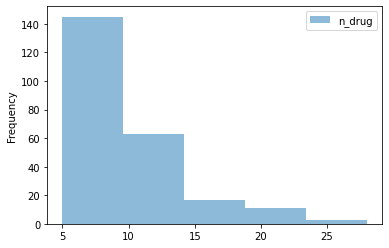

In [8]:
df = treatment[['n_drug']]
ax = df.plot.hist(bins=5, alpha=0.5)

In [9]:
set_drugs

{'Acarbose',
 'Acetaminophen',
 'Acetylcysteine',
 'Acetylsalicylic_acid',
 'Acyclovir',
 'Adenosine',
 'Albumin_human',
 'Aldesleukin',
 'Allopurinol',
 'Alprazolam',
 'Alteplase',
 'Aluminum_hydroxide',
 'Amiodarone',
 'Amlodipine',
 'Amphotericin_b',
 'Ampicillin',
 'Aprepitant',
 'Ascorbic_acid',
 'Atenolol',
 'Atorvastatin',
 'Atovaquone',
 'Atropine',
 'Azithromycin',
 'Aztreonam',
 'Barium_sulfate',
 'Beclomethasone_dipropionate',
 'Benzonatate',
 'Bevacizumab',
 'Bisacodyl',
 'Bismuth_subsalicylate',
 'Bortezomib',
 'Brimonidine',
 'Bumetanide',
 'Bupivacaine',
 'Calcium_acetate',
 'Calcium_carbonate',
 'Calcium_gluconate',
 'Carboplatin',
 'Carmustine',
 'Carvedilol',
 'Caspofungin',
 'Cefazolin',
 'Cefepime',
 'Ceftriaxone',
 'Cephalexin',
 'Cetirizine',
 'Chlorhexidine',
 'Chlorpromazine',
 'Ciprofloxacin',
 'Cisplatin',
 'Citalopram',
 'Clindamycin',
 'Clonazepam',
 'Clotrimazole',
 'Codeine',
 'Coenzyme_m',
 'Cyanocobalamin',
 'Cyclophosphamide',
 'Cyclosporine',
 'Cytarab

In [10]:
#drugBank_id_name = pd.read_csv('../store_data/drug/drugBank_id_name.csv', delimiter=",")
drugBank_id_name = pd.read_csv('../../data/Clarify/v6.2/drug/drugBank_id_name.csv', delimiter=",")
display(drugBank_id_name.shape, drugBank_id_name.head())

(14315, 2)

,DrugBankID,DrugName
0,DB00001,Lepirudin
1,DB00002,Cetuximab
2,DB00003,Dornase_alfa
3,DB00004,Denileukin_diftitox
4,DB00005,Etanercept


In [11]:
drug_treatment = pd.DataFrame(set_drugs, columns=['DrugName'])
drug_id = pd.merge(drugBank_id_name,drug_treatment,on='DrugName')
drug_id.to_csv('treatments/MIMIC_drugBank_id.csv', index=False)
drug_id

,DrugBankID,DrugName
0,DB00009,Alteplase
1,DB00016,Erythropoietin
2,DB00030,Insulin_human
3,DB00040,Glucagon
4,DB00041,Aldesleukin
...,...,...
235,DB13257,Ferrous_sulfate_anhydrous
236,DB14488,Ferrous_gluconate
237,DB14545,Hydrocortisone_succinate
238,DB15566,Prednisolone_acetate


In [12]:
fix_name = drug_treatment.merge(drug_id, how = 'outer' , on='DrugName', indicator=True).loc[lambda x : x['_merge']=='left_only']
fix_name

,DrugName,DrugBankID,_merge


In [13]:
q = list(fix_name.DrugName)
q.sort()
q

[]